# House Price Prediction Challenge

Welcome to the House Price Prediction Challenge, you will test your regression skills by designing an algorithm to accurately predict the house prices in India. Accurately predicting house prices can be a daunting task. The buyers are just not concerned about the size(square feet) of the house and there are various other factors that play a key role to decide the price of a house/property. It can be extremely difficult to figure out the right set of attributes that are contributing to understanding the buyer's behavior as such. This dataset has been collected across various property aggregators across India. In this competition, provided the 12 influencing factors your role as a data scientist is to predict the prices as accurately as possible.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/kaggle/input/house-price-prediction-challenge/test.csv")
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [3]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
count,68720.000000,68720.000000,68720.000000,6.872000e+04,68720.000000,68720.000000,68720.000000,68720.000000
mean,0.176557,0.316531,2.388198,2.762419e+03,0.823443,0.933498,21.288045,76.919388
std,0.381296,0.465126,0.864577,1.640991e+05,0.381296,0.249159,6.179034,10.100950
min,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,-38.391261,-118.354100
25%,0.000000,0.000000,2.000000,9.000310e+02,1.000000,1.000000,18.452663,73.798100
50%,0.000000,0.000000,2.000000,1.174982e+03,1.000000,1.000000,20.933260,77.324966
75%,0.000000,1.000000,3.000000,1.550265e+03,1.000000,1.000000,26.888396,78.000723
max,1.000000,1.000000,31.000000,4.016393e+07,1.000000,1.000000,65.183330,175.278040


In [4]:
df.shape

(68720, 11)

In [5]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE'],
      dtype='object')

In [6]:
df.dtypes

POSTED_BY              object
UNDER_CONSTRUCTION      int64
RERA                    int64
BHK_NO.                 int64
BHK_OR_RK              object
SQUARE_FT             float64
READY_TO_MOVE           int64
RESALE                  int64
ADDRESS                object
LONGITUDE             float64
LATITUDE              float64
dtype: object

In [7]:
df.isnull()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
68715,False,False,False,False,False,False,False,False,False,False,False
68716,False,False,False,False,False,False,False,False,False,False,False
68717,False,False,False,False,False,False,False,False,False,False,False
68718,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [9]:
df.sum()

POSTED_BY             OwnerDealerDealerDealerOwnerOwnerDealerDealerD...
UNDER_CONSTRUCTION                                                12133
RERA                                                              21752
BHK_NO.                                                          164117
BHK_OR_RK             BHKBHKBHKBHKBHKBHKBHKBHKBHKBHKBHKBHKBHKBHKBHKB...
SQUARE_FT                                              189833403.330136
READY_TO_MOVE                                                     56587
RESALE                                                            64150
ADDRESS               Kamrej,SuratPanvel,LalitpurNew Town,KolkataKal...
LONGITUDE                                                1462914.484697
LATITUDE                                                 5285900.364188
dtype: object

In [10]:
df.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

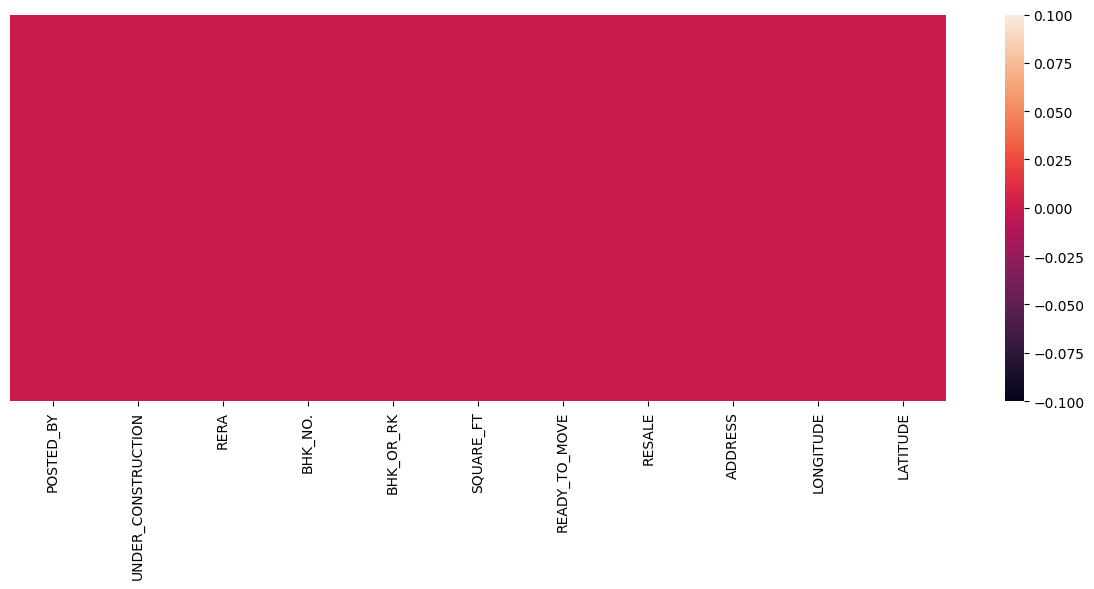

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),yticklabels=False)
plt.tight_layout()

In [12]:
numerical_columns = df.select_dtypes(include=['number'])

numerical_columns.columns

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE'],
      dtype='object')

BHK_OR_RK
BHK    68662
RK        58
Name: count, dtype: int64


<BarContainer object of 2 artists>

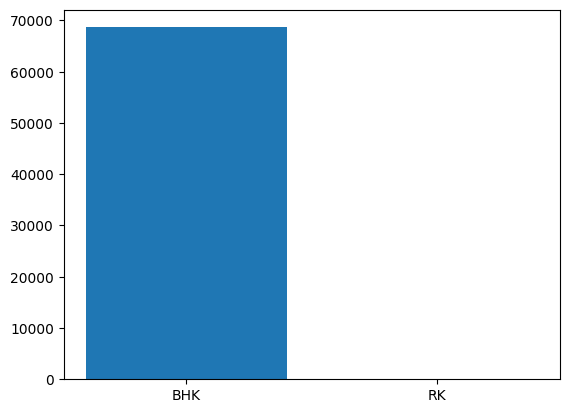

In [13]:
print(df["BHK_OR_RK"].value_counts())
plt.bar(["BHK","RK"],df["BHK_OR_RK"].value_counts())

In [14]:
df['CITY'] = df['ADDRESS'].str.split(',').str.get(1)
df['CITY'].value_counts()

CITY
Bangalore               9944
Lalitpur                7053
Pune                    4587
Mumbai                  4509
Kolkata                 4122
                        ... 
 Behind ABKARI THANA       1
New Shimla                 1
 Bmps Road                 1
 Purulia Road              1
Shimoga                    1
Name: count, Length: 722, dtype: int64